In [1]:
from typing import List, Dict

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

import bandits as bd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
rng = np.random.default_rng()

## Test Bandit class on single run

In [5]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0.1)

In [6]:
bandit.run(10000)

In [7]:
bandit.true_action_values

array([ 2.16723152, -0.66308361,  0.63500604,  0.09477051, -1.20816836,
        0.64347569,  1.24864156,  1.3163779 , -1.13050162,  0.15143111])

In [8]:
bandit.get_optimal_action()

0

In [9]:
bandit.estimated_action_values

array([ 2.16569455, -0.70483488,  0.71881713, -0.06938723, -1.05590514,
        0.46339191,  1.34434477,  1.36523309, -1.20308662,  0.06011512])

In [10]:
bandit.get_estimated_optimal_action()

0

In [13]:
def run_experiment(bandit, num_of_runs:int, num_of_steps:int):
    """Runs bandit experiments several times and returns mean of the results on each step"""
    rewards = []
    optimal_actions_selected = []
    for _ in range(num_of_runs):
        bandit.run(num_of_steps)
        rewards.append(bandit.rewards)
        optimal_actions_selected.append(bandit.optimal_actions_selected)
    rewards = np.array(rewards)
    optimal_actions_selected = np.array(optimal_actions_selected)
    mean_rewards = rewards.mean(axis=0)
    mean_optimal_actions_selected = optimal_actions_selected.mean(axis=0)
    return {
        "mean_rewards": mean_rewards,
        "mean_optimal_actions_selected": mean_optimal_actions_selected,
        "eps": bandit.eps
    }

In [21]:
def plot_experiment_results(experiments:List[Dict])->None:
    fig, ax = plt.subplots(nrows=2, figsize=(10,15))
    for experiment in experiments:
        ax[0].plot(range(len(experiment["mean_rewards"])), experiment["mean_rewards"], label=f"eps={experiment['eps']}")
        ax[1].plot(range(len(experiment["mean_optimal_actions_selected"])), experiment["mean_optimal_actions_selected"]*100, label=f"eps={experiment['eps']}")
    ax[0].legend(loc="lower right")
    ax[1].legend(loc="lower right")
    ax[0].set(xlabel='Steps', ylabel='Average Reward', title='Average Rewards')
    ax[1].set(xlabel='Steps', ylabel='Optimal Action Selected', title='Optimal Action Selection')
    ax[0].grid()
    ax[1].grid()
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

## Run experiment for stationary case with sample average step parameter

In [14]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0)
experiment_1 = run_experiment(bandit, 1000, 2000)

In [15]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0.01)
experiment_2 = run_experiment(bandit, 1000, 2000)

In [16]:
bandit = bd.BanditStationarySampleAverageStep(10, 1, 0.1)
experiment_3 = run_experiment(bandit, 1000, 2000)

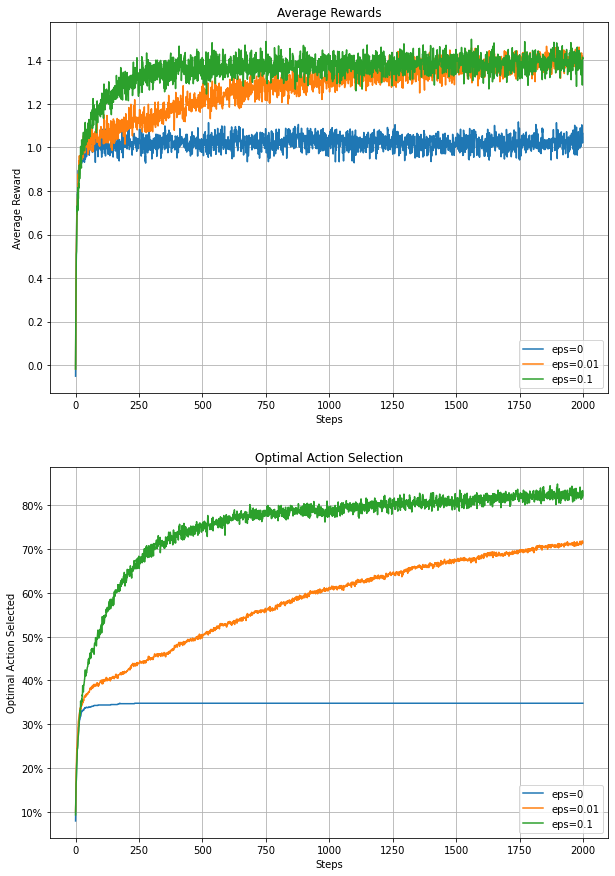

In [22]:
plot_experiment_results([experiment_1, experiment_2, experiment_3])

## Run experiment for non stationary case with sample average step parameter

In [38]:
bandit = bd.BanditNonStationarySampleAverageStep(10, 1, 0, 20)
experiment_1 = run_experiment(bandit, 1000, 2000)

In [39]:
bandit = bd.BanditNonStationarySampleAverageStep(10, 1, 0.01, 20)
experiment_2 = run_experiment(bandit, 1000, 2000)

In [40]:
bandit = bd.BanditNonStationarySampleAverageStep(10, 1, 0.1, 20)
experiment_3 = run_experiment(bandit, 1000, 2000)

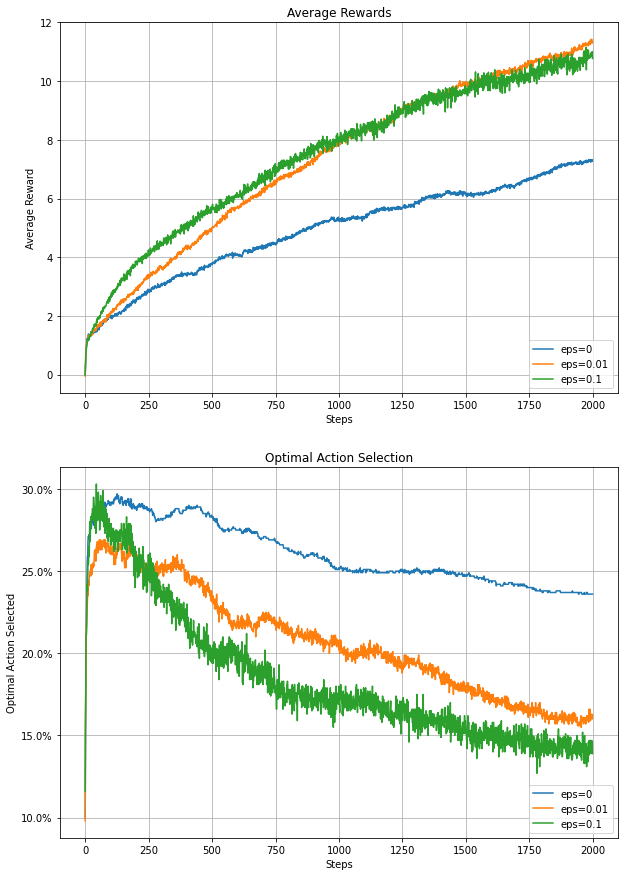

In [41]:
plot_experiment_results([experiment_1, experiment_2, experiment_3])

## Run experiment for non stationary case with constant step parameter

In [46]:
bandit = bd.BanditNonStationaryConstantStep(10, 1, 0, 0.1, 20)
experiment_1 = run_experiment(bandit, 1000, 2000)

In [47]:
bandit = bd.BanditNonStationaryConstantStep(10, 1, 0.01, 0.1, 20)
experiment_2 = run_experiment(bandit, 1000, 2000)

In [48]:
bandit = bd.BanditNonStationaryConstantStep(10, 1, 0.1, 0.1, 20)
experiment_3 = run_experiment(bandit, 1000, 2000)

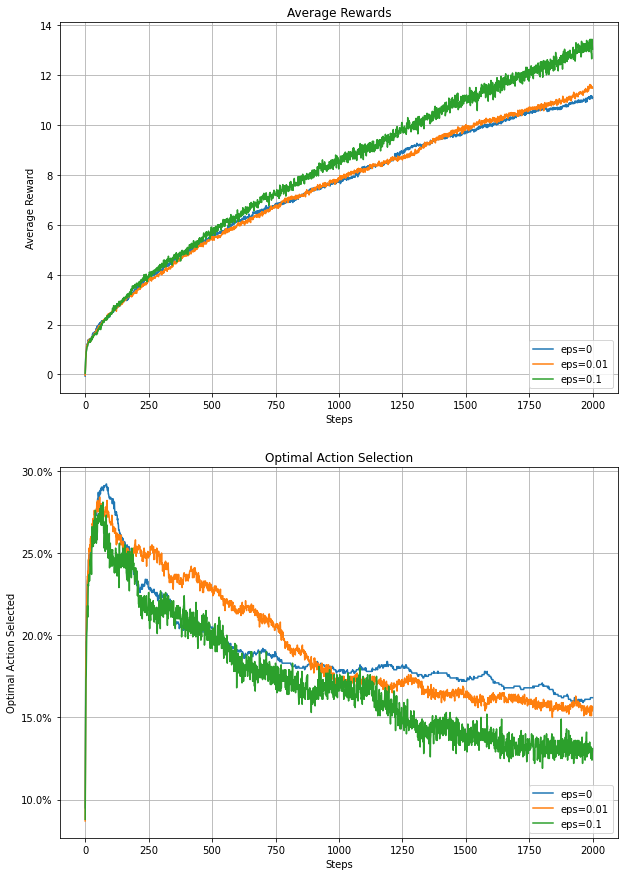

In [49]:
plot_experiment_results([experiment_1, experiment_2, experiment_3])